In [1]:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt
import zipfile

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [2]:
with zipfile.ZipFile('/kaggle/input/dogs-vs-cats/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/dogs-vs-cats')

In [3]:
os.mkdir('/kaggle/working/dogs-vs-cats/train/cats')
os.mkdir('/kaggle/working/dogs-vs-cats/train/dogs')

os.mkdir('/kaggle/working/dogs-vs-cats/validation')
os.mkdir('/kaggle/working/dogs-vs-cats/validation/cats')
os.mkdir('/kaggle/working/dogs-vs-cats/validation/dogs')

In [4]:
fnames = ['cat.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
    src = os.path.join('/kaggle/working/dogs-vs-cats/train', fname)
    dst = os.path.join('/kaggle/working/dogs-vs-cats/train/cats', fname)
    shutil.move(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join('/kaggle/working/dogs-vs-cats/train', fname)
    dst = os.path.join('/kaggle/working/dogs-vs-cats/validation/cats', fname)
    shutil.move(src, dst)

In [5]:
fnames = ['dog.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
    src = os.path.join('/kaggle/working/dogs-vs-cats/train', fname)
    dst = os.path.join('/kaggle/working/dogs-vs-cats/train/dogs', fname)
    shutil.move(src, dst)
       
fnames = ['dog.{}.jpg'.format(i) for i in range(10000, 12500)]
for fname in fnames:
    src = os.path.join('/kaggle/working/dogs-vs-cats/train', fname)
    dst = os.path.join('/kaggle/working/dogs-vs-cats/validation/dogs', fname)
    shutil.move(src, dst)

In [6]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2021-12-30 16:59:20.433569: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-30 16:59:20.521574: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-30 16:59:20.522215: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-30 16:59:20.523259: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),
             metrics=['acc'])

In [8]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),
             metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11214912  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________________________


# Data Generators

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory('/kaggle/working/dogs-vs-cats/train',
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 20000 images belonging to 2 classes.


In [11]:
validation_generator = val_datagen.flow_from_directory('/kaggle/working/dogs-vs-cats/validation',
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 5000 images belonging to 2 classes.


# Model fitting and Accuracy/Loss Evaluation

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50# for fast validating, there will be some randomness in results.
)

2021-12-30 16:59:23.834081: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2021-12-30 16:59:25.002179: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


100/100 [==============================] - 15s 81ms/step - loss: 0.6984 - acc: 0.5035 - val_loss: 0.6932 - val_acc: 0.4790
Epoch 2/10
100/100 [==============================] - 8s 84ms/step - loss: 0.6924 - acc: 0.5200 - val_loss: 0.6914 - val_acc: 0.5750
Epoch 3/10
100/100 [==============================] - 8s 79ms/step - loss: 0.6893 - acc: 0.5440 - val_loss: 0.6874 - val_acc: 0.5310
Epoch 4/10
100/100 [==============================] - 8s 78ms/step - loss: 0.6850 - acc: 0.5550 - val_loss: 0.6820 - val_acc: 0.5710
Epoch 5/10
100/100 [==============================] - 8s 80ms/step - loss: 0.6837 - acc: 0.5455 - val_loss: 0.6777 - val_acc: 0.5660
Epoch 6/10
100/100 [==============================] - 8s 75ms/step - loss: 0.6798 - acc: 0.5600 - val_loss: 0.6801 - val_acc: 0.5820
Epoch 7/10
100/100 [==============================] - 8s 75ms/step - loss: 0.6777 - acc: 0.5670 - val_loss: 0.6757 - val_acc: 0.5590
Epoch 8/10
100/100 [==============================] - 8s 80ms/step - loss: 0.66

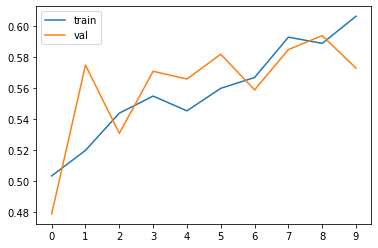

In [13]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [14]:
# median accuracy for training
median = np.median(history.history['acc'])

# standard deviation of training loss
std = np.std(history.history['loss'])

print (median, std)

0.5575000047683716 0.012511441123616846


# Data Augmentation

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory('/kaggle/working/dogs-vs-cats/train',
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')


Found 20000 images belonging to 2 classes.


In [17]:
validation_generator = test_datagen.flow_from_directory(
    '/kaggle/working/dogs-vs-cats/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 5000 images belonging to 2 classes.


# Model Fitting (augmented) and Accuracy/Loss Evaluation

In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 27s 265ms/step - loss: 0.6767 - acc: 0.5631 - val_loss: 0.6519 - val_acc: 0.6306
Epoch 2/10
100/100 [==============================] - 27s 263ms/step - loss: 0.6755 - acc: 0.5612 - val_loss: 0.6581 - val_acc: 0.6106
Epoch 3/10
100/100 [==============================] - 26s 263ms/step - loss: 0.6716 - acc: 0.5881 - val_loss: 0.6451 - val_acc: 0.6313
Epoch 4/10
100/100 [==============================] - 26s 264ms/step - loss: 0.6743 - acc: 0.5753 - val_loss: 0.6674 - val_acc: 0.5656
Epoch 5/10
100/100 [==============================] - 27s 268ms/step - loss: 0.6650 - acc: 0.5869 - val_loss: 0.6635 - val_acc: 0.5800
Epoch 6/10
100/100 [==============================] - 27s 267ms/step - loss: 0.6694 - acc: 0.5816 - val_loss: 0.6447 - val_acc: 0.6281
Epoch 7/10
100/100 [==============================] - 26s 258ms/step - loss: 0.6684 - acc: 0.5803 - val_loss: 0.6516 - val_acc: 0.6263
Epoch 8/10
100/100 [==============================] - 2

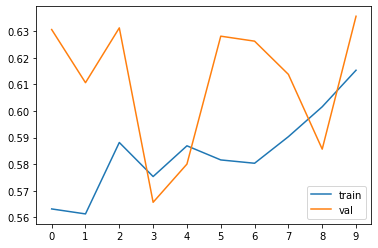

In [19]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [20]:
#mean of validation loss
np.mean(history.history['val_loss'])

0.6521604955196381

In [21]:
# mean of validation accuracy for the last 5 epochs
np.mean(history.history['val_acc'][5:10])

0.6178750038146973

In [22]:
model.evaluate(validation_generator)

157/157 [==============================] - 13s 83ms/step - loss: 0.6378 - acc: 0.6240


[0.6377586722373962, 0.6240000128746033]